<a href="https://colab.research.google.com/github/AsnaNavas/python-programs/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn matplotlib


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/fish.csv')

In [ ]:
print (data.head())

   Bream  242.0  23.2  25.4  30.0  38.4  13.4
0  Bream  290.0  24.0  26.3  31.2  40.0  13.8
1  Bream  340.0  23.9  26.5  31.1  39.8  15.1
2  Bream  363.0  26.3  29.0  33.5  38.0  13.3
3  Bream  430.0  26.5  29.0  34.0  36.6  15.1
4  Bream  450.0  26.8  29.7  34.7  39.2  14.2


In [ ]:
data.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
print(data.head())


  Species  Weight  Length1  Length2  Length3  Height  Width
0   Bream   290.0     24.0     26.3     31.2    40.0   13.8
1   Bream   340.0     23.9     26.5     31.1    39.8   15.1
2   Bream   363.0     26.3     29.0     33.5    38.0   13.3
3   Bream   430.0     26.5     29.0     34.0    36.6   15.1
4   Bream   450.0     26.8     29.7     34.7    39.2   14.2


In [ ]:
from sklearn.preprocessing import StandardScaler


data_numerical = data.drop('Species', axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)


kmeans.fit(data_scaled)

cluster_labels = kmeans.labels_


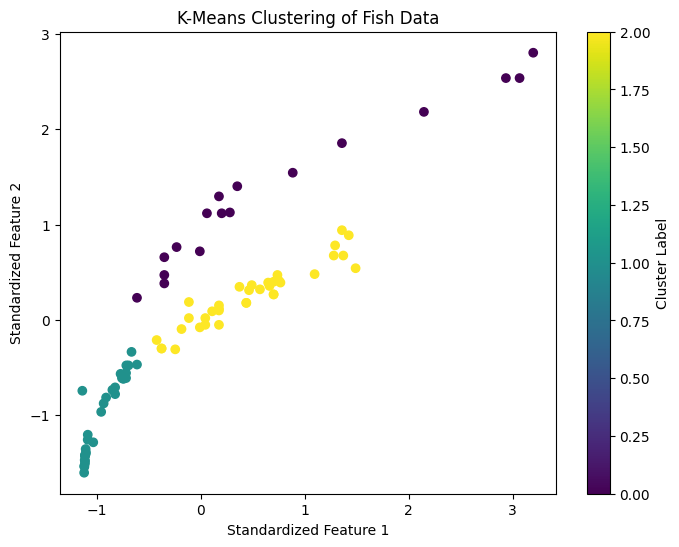

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering of Fish Data')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


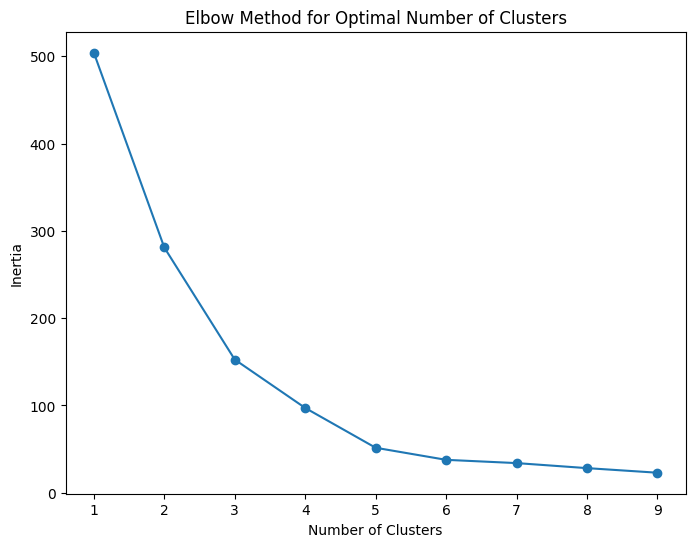

In [ ]:

inertia = []


for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
